# Increase contrast in CT data scan

The current visualization techniques are effective for dense structures such as titanium plates and bones, which stand out clearly due to their high intensity values. However, adjacent soft tissues—like different muscle groups or muscle and fat—often have very similar densities, making it difficult to distinguish them visually in the current renderings.

In this notebook we will try to improve the visibility of those soft tissue boundaries by enhancing the edges using the Sobel kernel, a convolution-based filter that highlights areas of rapid intensity change. This should help bring out subtle differences that are otherwise lost in the grayscale image.

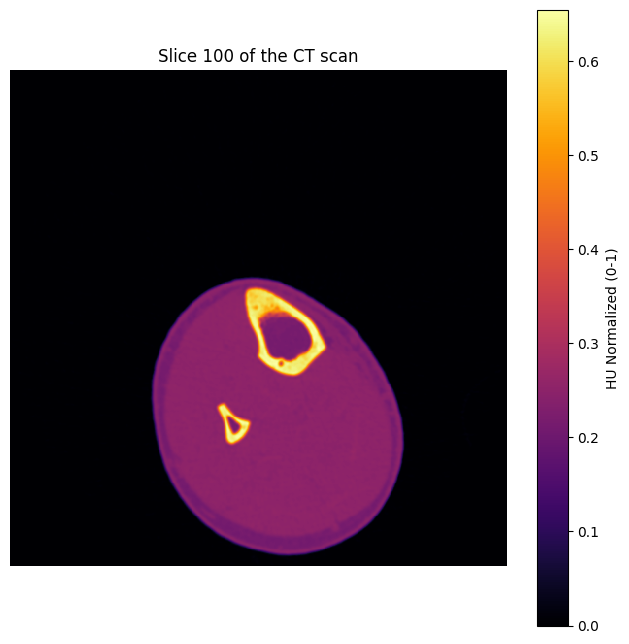

In [1]:
%reset -f
import nrrd 
import matplotlib.pyplot as plt
from scipy.ndimage import sobel
import numpy as np
import matplotlib.pyplot as plt

filename = "data/ct_scan_knee_postop.nrrd"
data, header = nrrd.read(filename)

# Select a slice
slice_index = 100
slice_data = data[slice_index] 

# Plot the slice
plt.figure(figsize=(8, 8))
plt.imshow(slice_data, cmap='inferno', interpolation='none')
plt.title(f'Slice {slice_index} of the CT scan')
plt.colorbar(label='HU Normalized (0-1)')
plt.axis('off')  # Hide axis
plt.show()

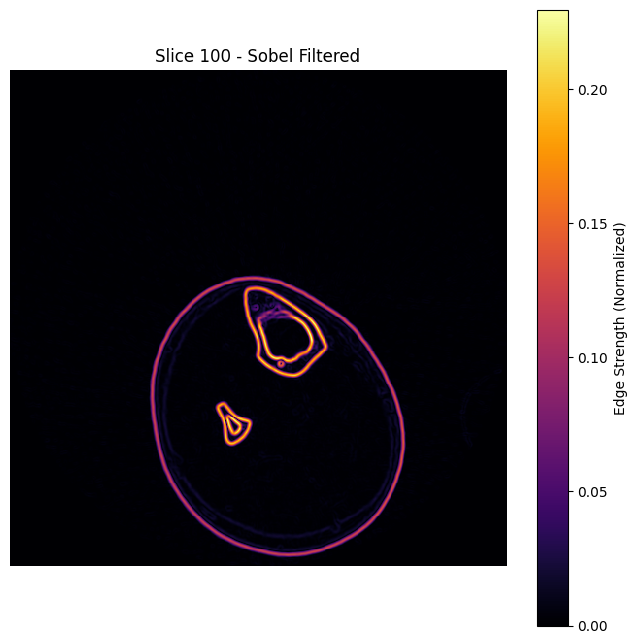

In [2]:
from scipy.ndimage import sobel
import numpy as np
import matplotlib.pyplot as plt

# Apply Sobel filter along each axis
sobel_x = sobel(data, axis=0)
sobel_y = sobel(data, axis=1)
sobel_z = sobel(data, axis=2)

# Combine gradients to get edge magnitude
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2 + sobel_z**2)

# Normalize for visualization
sobel_edges = (sobel_edges - sobel_edges.min()) / np.ptp(sobel_edges)

# Visualize the same slice
slice_data_sobel = sobel_edges[slice_index]

plt.figure(figsize=(8, 8))
plt.imshow(slice_data_sobel, cmap='inferno', interpolation='none')
plt.title(f'Slice {slice_index} - Sobel Filtered')
plt.colorbar(label='Edge Strength (Normalized)')
plt.axis('off')
plt.show()


In [3]:
output_filename = "data/ct_scan_knee_postop_sobel.nrrd"
nrrd.write(output_filename, sobel_edges, header)


In [4]:
output_filename

'data/ct_scan_knee_postop_sobel.nrrd'